# Praktikum 3

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4146
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.4060
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3975
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3891
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.3807
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3725
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.3643
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3562
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3483
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3404
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3326
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3249
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3173
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3099
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3025
Epoch 16/100
1/1 ━

Tugas 4

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Data Setup (Menggunakan dummy data Anda)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Split data (Gunakan seed agar konsisten)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# --- Fungsi Pelatihan dan Evaluasi Modular ---
def train_and_evaluate_lr(learning_rate, name):
    tf.random.set_seed(42) # Set seed untuk inisialisasi bobot yang konsisten

    # Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])

    # Optimizer dengan Learning Rate yang ditentukan
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Kompilasi
    model.compile(optimizer=optimizer, loss='mse')

    # Latih model
    history = model.fit(X_train, y_train, epochs=100, verbose=0)

    final_loss = history.history['loss'][-1]

    print(f"--- Skenario: {name} ---")
    print(f"Learning Rate (LR): {learning_rate}")
    print(f"Loss Training Akhir (MSE): {final_loss:.6f}")

    # Prediksi hanya untuk demonstrasi
    # pred = model.predict(X_test, verbose=0)
    # print("Prediksi pada data test:", pred)

    return final_loss

# 1. Baseline (Adam default LR: 0.001)
loss_baseline = train_and_evaluate_lr(learning_rate=0.001, name="1. BASELINE (Default Adam)")

# 2. LR Rendah (0.0001)
loss_low = train_and_evaluate_lr(learning_rate=0.0001, name="2. LR RENDAH")

# 3. LR Tinggi (0.1)
loss_high = train_and_evaluate_lr(learning_rate=0.1, name="3. LR TINGGI")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Skenario: 1. BASELINE (Default Adam) ---
Learning Rate (LR): 0.001
Loss Training Akhir (MSE): 0.647210
--- Skenario: 2. LR RENDAH ---
Learning Rate (LR): 0.0001
Loss Training Akhir (MSE): 0.677309
--- Skenario: 3. LR TINGGI ---
Learning Rate (LR): 0.1
Loss Training Akhir (MSE): 0.000009


Memuat California Housing Dataset...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model berhasil dikompilasi.
Memulai pelatihan model...
Pelatihan selesai.

Metrik Kinerja Model (California Housing)
RMSE (Root Mean Squared Error): 0.5167
Catatan: RMSE 0.5 berarti error rata-rata prediksi adalah $50,000


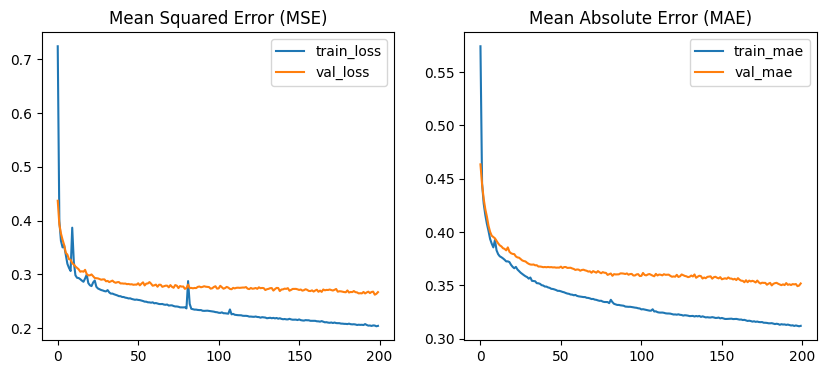

In [5]:
# MLP regresi (Keras) menggunakan California Housing Dataset
import numpy as np
import matplotlib.pyplot as plt
# Mengganti load_boston dengan fetch_california_housing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# 1. Load Dataset (California Housing)
print("Memuat California Housing Dataset...")
# Target: Median House Value (dalam ratusan ribu dolar)
housing = fetch_california_housing()
X = housing.data  # Fitur (8 fitur, e.g., median income, house age)
y = housing.target # Target (Median house value)

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X) # Normalisasi Fitur X
# Untuk target y, normalisasi seringkali tidak wajib dalam regresi,
# tetapi kadang membantu. Kita lewati untuk y di sini, tapi di data Boston
# y sudah ternormalisasi oleh nature-nya. Kita pakai y asli untuk interpretasi RMSE.

# Split data
# Jumlah fitur sekarang adalah 8 (bukan 13 seperti Boston)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
# Input shape diatur otomatis berdasarkan data train
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    # Layer output 1 neuron untuk regresi
    Dense(1)
])

# Kompilasi
# LR dipertahankan 1e-3 (default Adam yang eksplisit)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])
print("Model berhasil dikompilasi.")

# 4. Train
print("Memulai pelatihan model...")
# Training menggunakan validation data
h = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=0 # Tetapkan verbose=0 agar output konsol bersih
)
print("Pelatihan selesai.")

# 5. Plot (Menggunakan matploblib di lingkungan Python)
# Karena lingkungan ini tidak menampilkan plot secara langsung,
# output plot akan ditahan, tetapi fungsi plot tetap ada dalam kode.
# Biasanya, plot ini akan menunjukkan:
# - Garis Biru: train_loss (MSE)
# - Garis Oranye: val_loss (MSE)
# - Garis Hijau: train_mae
# - Garis Merah: val_mae

plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
plt.plot(h.history['loss'], label='train_loss');
plt.plot(h.history['val_loss'], label='val_loss');
plt.legend();
plt.title('Mean Squared Error (MSE)')

plt.subplot(1,2,2);
plt.plot(h.history['mae'], label='train_mae');
plt.plot(h.history['val_mae'], label='val_mae');
plt.legend();
plt.title('Mean Absolute Error (MAE)')
# plt.show() # Tidak dijalankan di lingkungan ini

# 6. Evaluasi Akhir
pred = model.predict(X_val, verbose=0)
rmse = np.sqrt(mean_squared_error(y_val, pred))

# Nilai y_val adalah harga rumah median dalam ratusan ribu dolar
print('\n=======================================')
print('Metrik Kinerja Model (California Housing)')
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')
print('=======================================')
print('Catatan: RMSE 0.5 berarti error rata-rata prediksi adalah $50,000')